In [ ]:
%pip install pandas seaborn matplotlib scipy

https://www.kaggle.com/datasets/tarekmasryo/football-matches-20242025-top-5-leagues

In [10]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import MaxNLocator


In [11]:
DATASET = os.path.join("dataset", "football_matches_2024_2025.csv")

In [12]:
df: pd.DataFrame = pd.read_csv(DATASET, encoding='utf-8')

In [13]:
len(df)

1941

In [14]:
df['competition_name'].value_counts()

competition_name
Premier League           380
La Liga                  380
Serie A                  380
Bundesliga               306
Ligue 1                  306
UEFA Champions League    189
Name: count, dtype: int64

In [15]:
df.head()

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,date_local_africa_cairo
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0.0,0.0,1,1,Home Win,3,0,2024-08-16 22:00
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0.0,0.0,-2,2,Away Win,0,3,2024-08-17 14:30
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1.0,0.0,2,2,Home Win,3,0,2024-08-17 17:00
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0.0,1.0,-3,3,Away Win,0,3,2024-08-17 17:00
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1.0,0.0,1,1,Home Win,3,0,2024-08-17 17:00


In [16]:

vars_sel = ["total_goals", "goal_difference", "halftime_home"]
subset = df[vars_sel]

# Estatísticas básicas
describe_df = subset.agg(['mean', 'median', 'std']).T
print("Estatísticas (média, mediana, desvio padrão):")
print(describe_df)

# Matriz de covariância 3x3
cov_matrix = subset.corr()
print("\nMatriz de Covariância:")
print(cov_matrix)

Estatísticas (média, mediana, desvio padrão):
                     mean  median       std
total_goals      2.875837     3.0  1.693997
goal_difference  0.195775     0.0  1.880667
halftime_home    0.700000     1.0  0.860394

Matriz de Covariância:
                 total_goals  goal_difference  halftime_home
total_goals         1.000000         0.093063       0.517222
goal_difference     0.093063         1.000000       0.518483
halftime_home       0.517222         0.518483       1.000000


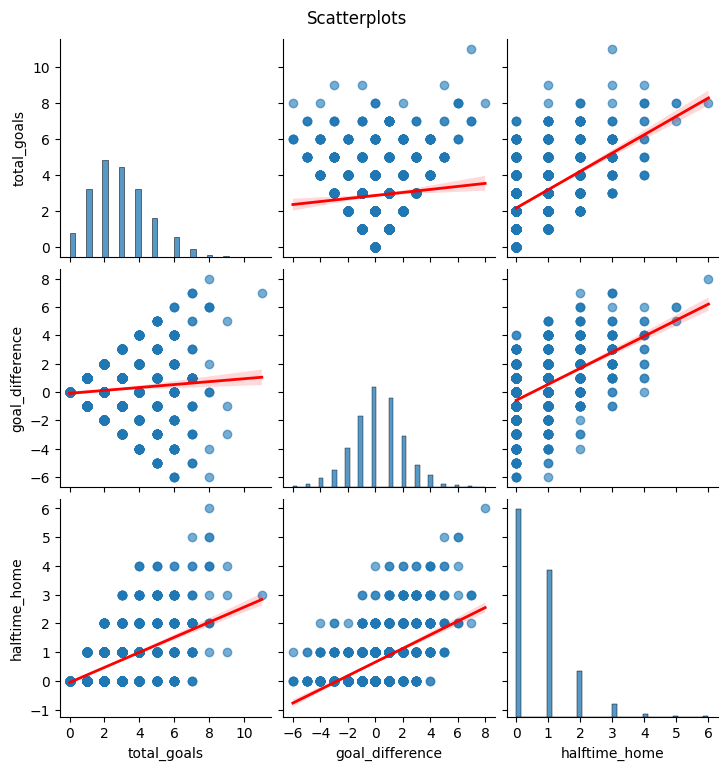

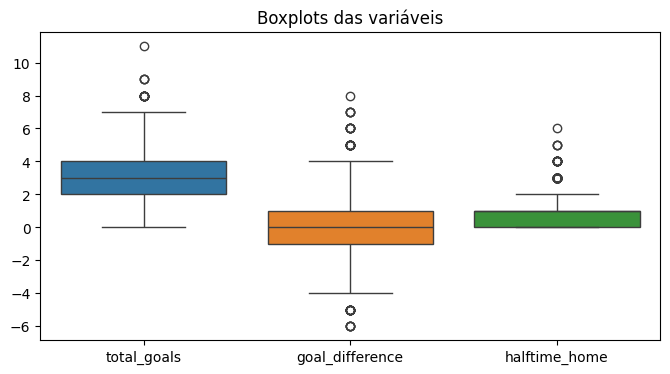

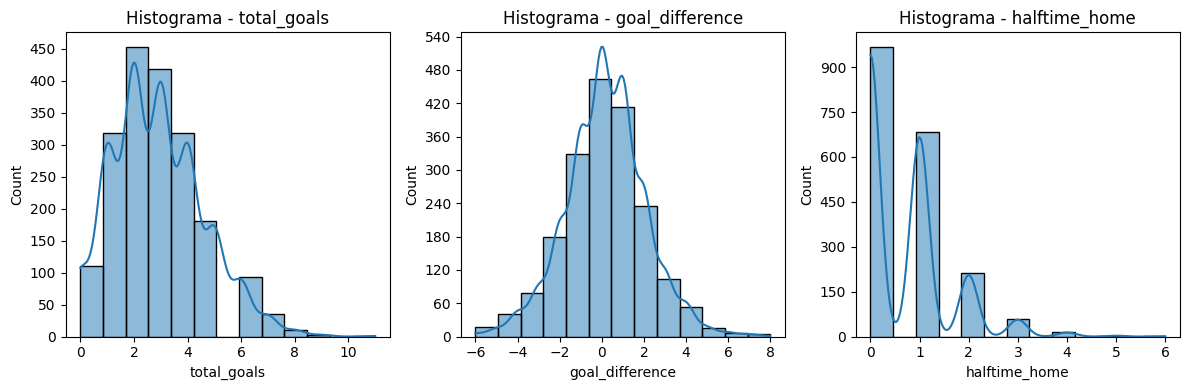

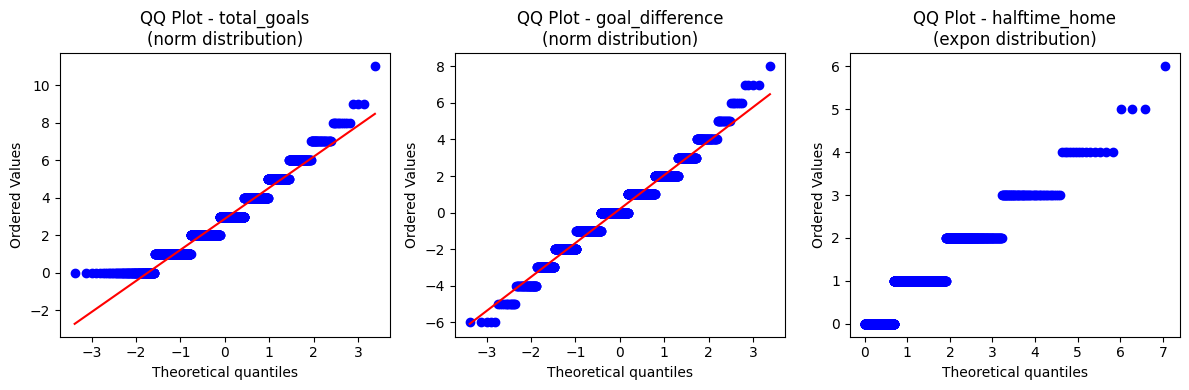

In [17]:
# Scatterplot pairwise (pairplot) com linhas de regressão (melhor ajuste linear)
g = sns.pairplot(
    subset,
    kind="reg",
    diag_kind="hist",
    plot_kws={
        'line_kws': {'color': 'red', 'linewidth': 2},
        'scatter_kws': {'alpha': 0.6}
    }
)
# Forçar apenas inteiros nos eixos
for ax in g.axes.flatten():
    if ax is not None:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.suptitle("Scatterplots", y=1.02)
plt.show()

# Boxplots
plt.figure(figsize=(8,4))
sns.boxplot(data=subset)
plt.title("Boxplots das variáveis")
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

# Histogramas individuais
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, col in zip(axes, subset.columns):
    sns.histplot(subset[col], kde=True, ax=ax, bins=13)
    ax.set_title(f"Histograma - {col}")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# QQ Plots
distribs = ["norm", "norm", "expon"]

fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, col, dist in zip(axes, subset.columns, distribs):
    stats.probplot(subset[col], dist=dist, plot=ax)
    ax.set_title(f"QQ Plot - {col}\n({dist} distribution)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()